# K-Means, Mixture Models and EM Algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy import stats
from math import log, sqrt, pi

## Data Pre-Processing
i) Load data into python and print information about the dataframe.

ii) Assign exact column names to dataframe (Column names can be found in .names file
provided in Blackboard.)

iii) Check missing values.

iv) Perform one-hot encoding to ’sex’.

v) Perform min-max normalisation on numerical variables(exclude target variable ’Rings’).

vi) Transform target variable: (’Rings’+ 1.5 = Age (yrs)) and remove ’Rings’ in dataframe.

vii) Plot bar charts for numerical variables

Q2.2.1.i DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

First 5 rows of the dataset:
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420  

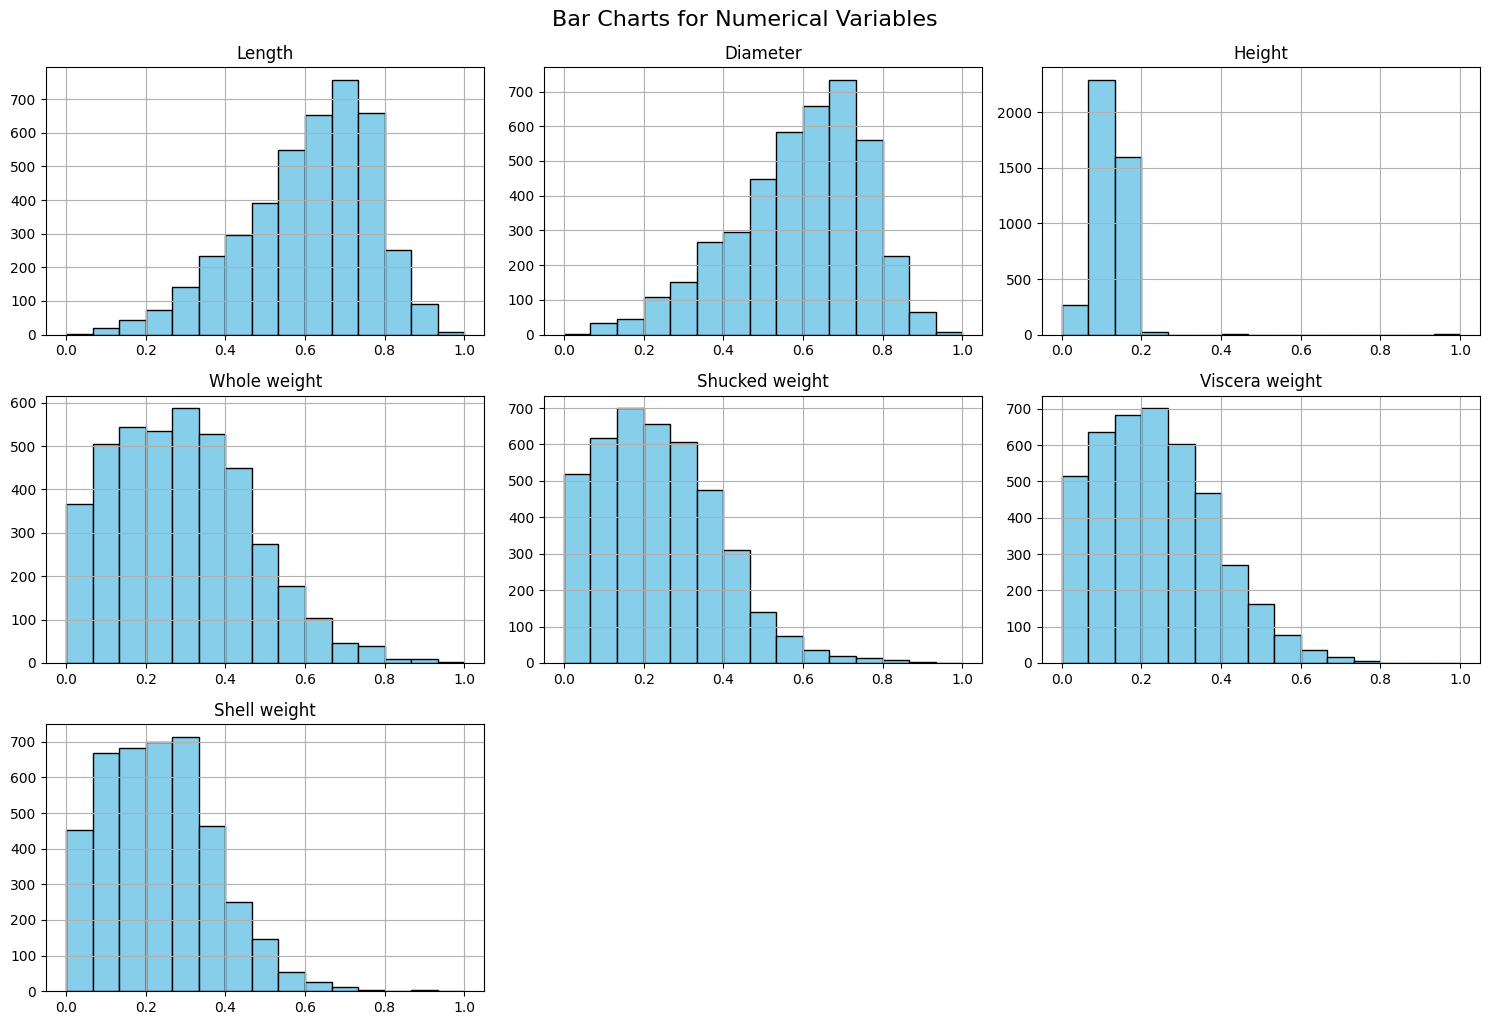

In [2]:
# -------------------------------
# 2.2.1 Data Pre-Processing (7 points)
# -------------------------------

# ii) Assign exact column names to dataframe
column_names = [
    'Sex',
    'Length',
    'Diameter',
    'Height',
    'Whole weight',
    'Shucked weight',
    'Viscera weight',
    'Shell weight',
    'Rings'
]

# i) Load data into python and print information about the dataframe.
# Assuming the dataset is in CSV format and named 'abalone.csv'
dataset = pd.read_csv('abalone.data', header=None, names=column_names)

print("Q2.2.1.i DataFrame Information:")
print(dataset.info())
print("\nFirst 5 rows of the dataset:")
print(dataset.head())

# iii) Check for missing values
missing_values = dataset.isnull().sum()
print("\nQ2.2.1.iii Missing Values in Each Column:")
print(missing_values)

# iv) Perform one-hot encoding to 'Sex'
dataset_encoded = pd.get_dummies(dataset, columns=['Sex'])
print("\nQ2.2.1.iv One-Hot Encoded 'Sex' Column:")
print(dataset_encoded.head())

# v) Perform min-max normalization on numerical variables (exclude 'Rings')
numerical_cols = ['Length', 'Diameter', 'Height', 'Whole weight',
                  'Shucked weight', 'Viscera weight', 'Shell weight']

scaler = MinMaxScaler()
dataset_encoded[numerical_cols] = scaler.fit_transform(dataset_encoded[numerical_cols])
print("\nQ2.2.1.v Min-Max Normalised Numerical Variables:")
print(dataset_encoded.head())

# vi) Transform target variable: ('Rings' + 1.5 = Age (yrs)) and remove 'Rings'
dataset_encoded['Age'] = dataset_encoded['Rings'] + 1.5
dataset_encoded.drop('Rings', axis=1, inplace=True)
print("\nQ2.2.1.vi Transformed 'Rings' to 'Age' and Removed 'Rings':")
print(dataset_encoded.head())

# vii) Plot bar charts for numerical variables
dataset_encoded[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle('Bar Charts for Numerical Variables', fontsize=16, y=1.02)  # Adjusted y-position
plt.show()

## K-Means Clustering(using sklearn)
i) Construct model with k = 5 (3pts)

ii) Compute and print silhouette coefficients. (2pts)

In [3]:
# -------------------------------
# 2.2.2 K-Means Clustering (5 points)
# -------------------------------

# Define feature set for clustering (excluding target variable 'Age')
features = dataset_encoded.drop('Age', axis=1)

# i) Construct model with k = 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)
clusters = kmeans.labels_
dataset_encoded['Cluster'] = clusters

print("\nQ2.2.2.1 K-Means Clustering with k=5 Completed.")
print(dataset_encoded['Cluster'].value_counts())

# ii) Compute and print silhouette coefficients
sil_score = silhouette_score(features, clusters)
print("\nQ2.2.2.2 Silhouette Coefficient for K-Means (k=5):")
print(f"Silhouette Coefficient: {sil_score:.4f}")

# The Silhouette Coefficient is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
#It is commonly used to evaluate the quality of clustering algorithms (e.g., K-means, DBSCAN, hierarchical clustering).

# The silhouette coefficient provides insight into whether the clusters found by the algorithm are well-defined or if the points are placed ambiguously between clusters.
# A higher silhouette score indicates a better clustering result.


Q2.2.2.1 K-Means Clustering with k=5 Completed.
Cluster
0    1342
1     868
4     681
3     660
2     626
Name: count, dtype: int64

Q2.2.2.2 Silhouette Coefficient for K-Means (k=5):
Silhouette Coefficient: 0.5722


## GMM and EM Algorithms
i) Fit Gaussian Mixture Model with 2 Gaussians on [’Whole weights’] using EM Algorithm
(choose number of iteration = 20).
Third party packages are not allowed for this task, you can refer to reference link above.
(5pts)

ii) Plot fitted GMM. (1pt)

iii) Now with the help of sklearn, fit GMM with 2 Gaussians on [’Whole weights’] again and
Plot fitted GMM. (3pts)

iv) Fit GMM with all predictors (sklearn is allowed to use). (2pts)

v) Compute and print silhouette coefficients for GMM modelled in iii) and compare it withyour results 2.2.2. Briefly explain your preference. (2pts)


In [4]:
dataset_encoded

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Age,Cluster
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,False,False,True,16.5,3
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,False,False,True,8.5,3
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,True,False,False,10.5,2
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,False,False,True,11.5,3
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,False,True,False,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,True,False,False,12.5,2
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,False,False,True,11.5,1
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,False,False,True,10.5,1
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,True,False,False,11.5,4


Iteration 1: Log-Likelihood = -6225.007141
Convergence reached.

Q2.2.3.i GMM with EM Algorithm Completed.
Cluster assignments (Cluster_EM) distribution:
Cluster_EM
0    2289
1    1888
Name: count, dtype: int64


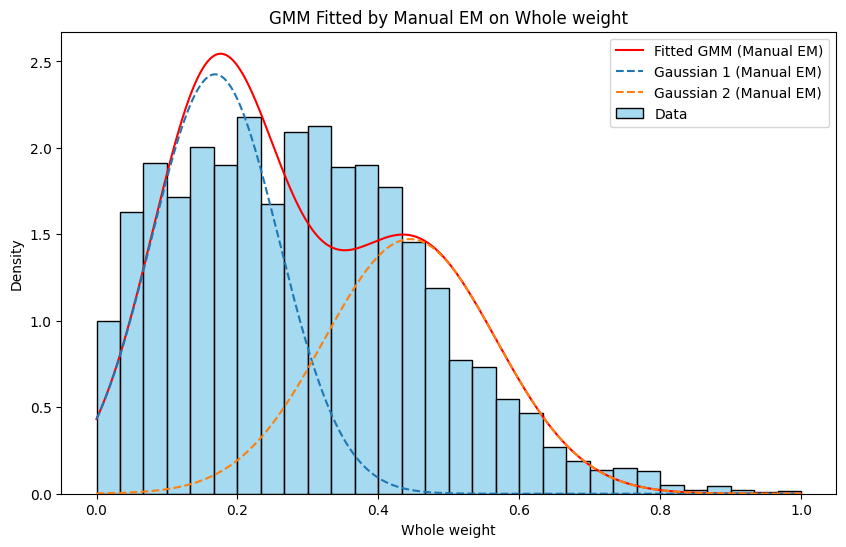


Q2.2.3.iii GMM with sklearn Completed.
Gaussian 1: μ = -0.7154, σ = 0.5584, weight = 0.4906
Gaussian 2: μ = 0.6888, σ = 0.8339, weight = 0.5094


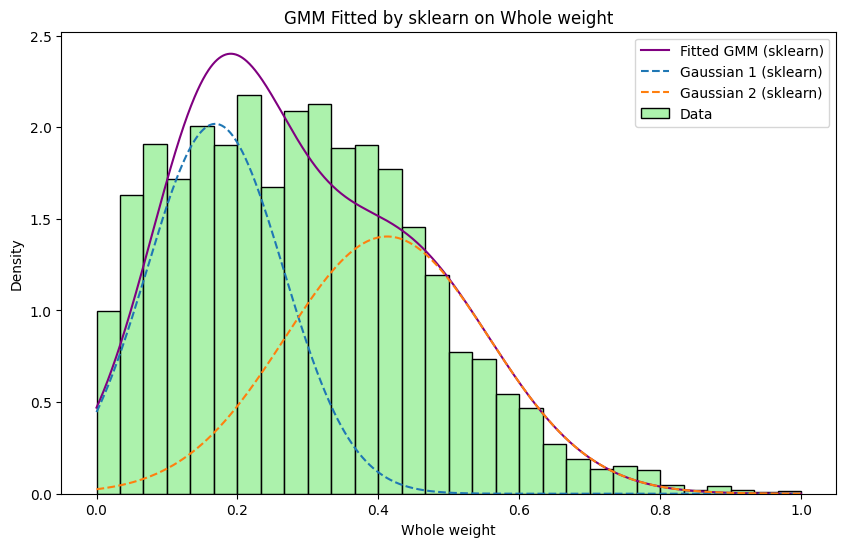


Q2.2.3.iv GMM with All Predictors Completed.
Cluster assignments (Cluster_GMM_All) distribution:
Cluster_GMM_All
1    2835
0    1342
Name: count, dtype: int64

Q2.2.3.v Silhouette Coefficient Comparison:

Q2.2.2.2 Silhouette Coefficient for K-Means (k=5):
Silhouette Coefficient: 0.5722
GMM (sklearn, k=2) Silhouette Coefficient: 0.5804

Preference Explanation:
GMM with sklearn has a higher silhouette coefficient compared to K-Means, indicating better clustering performance.


In [5]:
# -------------------------------
# 2.2.3 GMM and EM Algorithms (13 points)
# -------------------------------

# Define the Gaussian class
class Gaussian:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def pdf(self, x):
        # Prevent division by zero in sigma
        sigma = self.sigma if self.sigma > 1e-6 else 1e-6
        return (1. / sqrt(2 * pi) / sigma) * np.exp(- (x - self.mu) ** 2 / (2 * self.sigma ** 2))

    def __repr__(self):
        return f"Gaussian(mu={self.mu:.4f}, sigma={self.sigma:.4f})"

# Define the Gaussian Mixture Model with EM Algorithm
class GaussianMixture_self:
    def __init__(self, data, n_components=2, sigma_min=1.0, sigma_max=1.0, random_state=42):
        self.data = data
        self.n_components = n_components
        self.random_state = random_state
        np.random.seed(self.random_state)

        # Initialize means using K-Means
        kmeans = KMeans(n_clusters=self.n_components, random_state=self.random_state)
        kmeans.fit(self.data.reshape(-1, 1))
        means = kmeans.cluster_centers_.flatten()

        # Initialize sigmas to the standard deviation of the data divided by 2
        sigmas = np.full(self.n_components, np.std(self.data) / 2)

        # Initialize mixing coefficients uniformly
        self.mix = np.full(self.n_components, 1.0 / self.n_components)

        # Initialize Gaussian components
        self.gaussians = [Gaussian(mu, sigma) for mu, sigma in zip(means, sigmas)]

        # Log-likelihood
        self.loglike = -np.inf

    def Estep(self):
        gamma = []
        loglike_new = 0.0  # Reset log-likelihood

        for datum in self.data:
            # Compute the weighted probability for each component
            probs = np.array([g.pdf(datum) * self.mix[k] for k, g in enumerate(self.gaussians)])

            # Compute log-sum-exp for numerical stability
            sum_probs = np.sum(probs)
            if sum_probs == 0:
                sum_probs = 1e-10  # Prevent division by zero

            # Responsibilities
            resp = probs / sum_probs
            gamma.append(resp)

            # Update log-likelihood
            loglike_new += np.log(sum_probs)

        self.loglike = loglike_new
        return np.array(gamma)

    def Mstep(self, weights):
        # Update mixing coefficients
        Nk = np.sum(weights, axis=0)
        self.mix = Nk / len(self.data)

        # Update means and sigmas
        for k in range(self.n_components):
            if Nk[k] == 0:
                Nk[k] = 1e-10  # Prevent division by zero
            # Update mean
            self.gaussians[k].mu = np.sum(weights[:, k] * self.data) / Nk[k]
            # Update sigma
            variance = np.sum(weights[:, k] * (self.data - self.gaussians[k].mu) ** 2) / Nk[k]
            self.gaussians[k].sigma = sqrt(variance) if variance > 0 else 1e-6

    def iterate(self, N=20, tol=1e-6, verbose=False):
        for i in range(N):
            weights = self.Estep()
            old_loglike = self.loglike
            self.Mstep(weights)
            if verbose:
                print(f"Iteration {i+1}: Log-Likelihood = {self.loglike:.6f}")
            if abs(self.loglike - old_loglike) < tol:
                if verbose:
                    print("Convergence reached.")
                break

    def pdf(self, x):
        return np.sum([self.mix[k] * self.gaussians[k].pdf(x) for k in range(self.n_components)], axis=0)

    def sort_components(self):
        # Sort the Gaussian components based on their means
        sorted_indices = np.argsort([g.mu for g in self.gaussians])
        self.gaussians = [self.gaussians[i] for i in sorted_indices]
        self.mix = self.mix[sorted_indices]

    def __repr__(self):
        gaussians_str = ', '.join([str(g) for g in self.gaussians])
        mix_str = ', '.join([f"{m:.4f}" for m in self.mix])
        return f"GaussianMixture(Self): [{gaussians_str}], mix=[{mix_str}]"

# -------------------------------
# 2.2.3.i Fit Gaussian Mixture Model with 2 Gaussians on 'Whole weight' Using EM Algorithm
# -------------------------------

# Extract 'Whole weight' feature
whole_weight = dataset_encoded['Whole weight'].values

# Normalize data for numerical stability
mean_whole_weight = np.mean(whole_weight)
std_whole_weight = np.std(whole_weight)
data = (whole_weight - mean_whole_weight) / std_whole_weight

# Initialize and fit the Gaussian Mixture Model
n_iterations = 20
random_seed = 42
mix = GaussianMixture_self(data, random_state=random_seed)

# Perform EM iterations with verbose output
mix.iterate(N=n_iterations, tol=1e-6, verbose=True)

# Sort components for consistency
mix.sort_components()

# After iterations, assign clusters based on highest responsibility
final_weights = mix.Estep()
clusters_em = np.argmax(final_weights, axis=1)

# Add cluster labels to the dataframe
dataset_encoded['Cluster_EM'] = clusters_em

print("\nQ2.2.3.i GMM with EM Algorithm Completed.")
print("Cluster assignments (Cluster_EM) distribution:")
print(dataset_encoded['Cluster_EM'].value_counts())







# -------------------------------
# 2.2.3.ii Plot Fitted GMM
# -------------------------------

# Denormalize data for plotting
data_denorm = data * std_whole_weight + mean_whole_weight
x = np.linspace(np.min(data_denorm), np.max(data_denorm), 1000)

# Define the PDF for plotting
def mixture_pdf(x, mix_coef, gaussians):
    return np.sum([mix_coef[k] * g.pdf(x) for k, g in enumerate(gaussians)], axis=0)

# Denormalize means and sigmas
means_denorm = np.array([g.mu for g in mix.gaussians]) * std_whole_weight + mean_whole_weight
sigmas_denorm = np.array([g.sigma for g in mix.gaussians]) * std_whole_weight

# Create Gaussian instances with denormalized parameters
gaussians_denorm = [Gaussian(mu, sigma) for mu, sigma in zip(means_denorm, sigmas_denorm)]

# Compute mixture PDF
pdf_mixture = mixture_pdf(x, mix.mix, gaussians_denorm)

# Plotting GMM fitted by Manual EM
plt.figure(figsize=(10, 6))
sns.histplot(data_denorm, bins=30, stat='density', color='skyblue', edgecolor='black', label='Data')
plt.plot(x, pdf_mixture, color='red', label='Fitted GMM (Manual EM)')

# Plot individual Gaussians
for k, g in enumerate(gaussians_denorm):
    plt.plot(x, mix.mix[k] * g.pdf(x), linestyle='--', label=f'Gaussian {k+1} (Manual EM)')

plt.title('GMM Fitted by Manual EM on Whole weight')
plt.xlabel('Whole weight')
plt.ylabel('Density')
plt.legend()
plt.show()






# -------------------------------
# 2.2.3.iii Fit GMM with sklearn and plot
# -------------------------------

# Fit GMM using sklearn on 'Whole weight'
gmm = GaussianMixture(n_components=2, tol=1e-3, max_iter=20, random_state=random_seed)
gmm.fit(data.reshape(-1, 1))

# Extract parameters
means_sk = gmm.means_.flatten()
covariances_sk = gmm.covariances_.flatten()
weights_sk = gmm.weights_.flatten()

print("\nQ2.2.3.iii GMM with sklearn Completed.")
for i, (mu, sigma, weight) in enumerate(zip(means_sk, np.sqrt(covariances_sk), weights_sk), 1):
    print(f"Gaussian {i}: μ = {mu:.4f}, σ = {sigma:.4f}, weight = {weight:.4f}")

# Assign cluster labels
clusters_sk = gmm.predict(data.reshape(-1, 1))
dataset_encoded['Cluster_sk'] = clusters_sk

# Sort sklearn's components based on means for consistency
sorted_indices_sk = np.argsort(means_sk)
means_sk = means_sk[sorted_indices_sk]
covariances_sk = covariances_sk[sorted_indices_sk]
weights_sk = weights_sk[sorted_indices_sk]
gmm.weights_ = weights_sk
gmm.means_ = means_sk.reshape(-1, 1)
gmm.covariances_ = covariances_sk.reshape(-1, 1, 1)

# Prepare x for plotting in normalized scale
x_normalized = np.linspace(np.min(data), np.max(data), 1000).reshape(-1, 1)

# Compute PDF on normalized scale
pdf_gmm_sk_normalized = np.exp(gmm.score_samples(x_normalized))

# Denormalize x
x_denorm_sk = x_normalized.flatten() * std_whole_weight + mean_whole_weight

# Denormalize the PDF
# The scaling factor for PDF is the inverse of the standard deviation
pdf_gmm_sk_denorm = pdf_gmm_sk_normalized / std_whole_weight

# Plotting GMM fitted by sklearn
plt.figure(figsize=(10, 6))
sns.histplot(data_denorm, bins=30, stat='density', color='lightgreen', edgecolor='black', label='Data')

# Plot the denormalized GMM PDF
plt.plot(x_denorm_sk, pdf_gmm_sk_denorm, color='purple', label='Fitted GMM (sklearn)')

# Plot individual Gaussians
for i, (mu, sigma, weight) in enumerate(zip(means_sk, np.sqrt(covariances_sk), weights_sk), 1):
    # Denormalize mu and sigma
    mu_denorm = mu * std_whole_weight + mean_whole_weight
    sigma_denorm_i = sigma * std_whole_weight
    pdf = stats.norm(mu_denorm, sigma_denorm_i).pdf(x_denorm_sk) * weight
    plt.plot(x_denorm_sk, pdf, linestyle='--', label=f'Gaussian {i} (sklearn)')

plt.title('GMM Fitted by sklearn on Whole weight')
plt.xlabel('Whole weight')
plt.ylabel('Density')
plt.legend()
plt.show()






# -------------------------------
# 2.2.3.iv Fit GMM with all predictors using sklearn
# -------------------------------

# Define feature set for GMM (excluding 'Age' and existing cluster labels)
features_all = dataset_encoded.drop(['Age', 'Cluster', 'Cluster_EM', 'Cluster_sk'], axis=1)

# Fit GMM with sklearn on all predictors
gmm_all = GaussianMixture(n_components=2, covariance_type='full', random_state=random_seed, max_iter=100)
gmm_all.fit(features_all)

# Predict cluster assignments
clusters_gmm_all = gmm_all.predict(features_all)

# Add cluster labels to the dataframe
dataset_encoded['Cluster_GMM_All'] = clusters_gmm_all

print("\nQ2.2.3.iv GMM with All Predictors Completed.")
print("Cluster assignments (Cluster_GMM_All) distribution:")
print(dataset_encoded['Cluster_GMM_All'].value_counts())

# -------------------------------
# 2.2.3.v Compute and print silhouette coefficients for GMM (sklearn) and compare with K-Means
# -------------------------------

# Assuming 'features' is defined elsewhere in your code
# For demonstration, using 'features_all' as 'features'
features = features_all

# Silhouette Score for K-Means (k=5)
# Assuming K-Means clustering has been performed and 'Cluster' column exists
if 'Cluster' in dataset_encoded.columns:
    sil_score_kmeans = silhouette_score(features, dataset_encoded['Cluster'])
else:
    # If 'Cluster' column doesn't exist, perform K-Means clustering
    kmeans = KMeans(n_clusters=5, random_state=random_seed)
    clusters_kmeans = kmeans.fit_predict(features)
    dataset_encoded['Cluster'] = clusters_kmeans
    sil_score_kmeans = silhouette_score(features, clusters_kmeans)

# Silhouette Score for GMM (sklearn, k=2) on 'Whole weight'
sil_score_gmm_sk = silhouette_score(data.reshape(-1,1), dataset_encoded['Cluster_sk'])

print("\nQ2.2.3.v Silhouette Coefficient Comparison:")
print("\nQ2.2.2.2 Silhouette Coefficient for K-Means (k=5):")
print(f"Silhouette Coefficient: {sil_score:.4f}")
print(f"GMM (sklearn, k=2) Silhouette Coefficient: {sil_score_gmm_sk:.4f}")

# Brief explanation based on comparison
print("\nPreference Explanation:")
if sil_score_gmm_sk > sil_score_kmeans:
    print("GMM with sklearn has a higher silhouette coefficient compared to K-Means, indicating better clustering performance.")
else:
    print("K-Means has a higher silhouette coefficient compared to GMM with sklearn, indicating better clustering performance.")

# Q2.2.2.1 K-Means Clustering with k=5 Completed.
# Cluster
# 0    1342
# 1     868
# 4     681
# 3     660
# 2     626
# Name: count, dtype: int64

# Q2.2.2.2 Silhouette Coefficient for K-Means (k=5):
# Silhouette Coefficient: 0.5722

In [6]:
features_all

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,False,False,True
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,False,False,True
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,True,False,False
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,False,False,True
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,False,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,True,False,False
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,False,False,True
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,False,False,True
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,True,False,False
